In [ ]:

#!pip install keras
#!pip install tensorflow

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
path_train = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013train-A.txt'
path_test = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013test-A.txt'
path_valid = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013dev-A.txt'

In [ ]:
df_train = pd.read_csv(path_train,names=['id','polarity','text'],sep='\t')
df_valid = pd.read_csv(path_valid,names=['id','polarity','text'],sep='\t')
df_test = pd.read_csv(path_test,names=['id','polarity','text'],sep='\t')

In [ ]:
df_test

,id,polarity,text
0,264238274963451904,positive,"@jjuueellzz down in the Atlantic city, ventnor..."
1,218775148495515649,positive,Musical awareness: Great Big Beautiful Tomorro...
2,258965201766998017,neutral,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...
3,262926411352903682,negative,"Kapan sih lo ngebuktiin,jan ngomong doang Susa..."
4,171874368908050432,neutral,"Excuse the connectivity of this live stream, f..."
...,...,...,...
3542,264233437060288512,negative,Khaleda Zia's present India visit may have a b...
3543,263779058284904448,neutral,"FYI, golf fans: @jameslepp will join Moj on We..."
3544,250744453831213056,negative,@__Aniko you think mr.Calle let practice with ...
3545,258679974591090688,positive,Don't hide under your desk! It's just a salsa ...


In [ ]:
print(f'Train size {df_train.shape}')
print(f'Valid size {df_valid.shape}')
print(f'Test size {df_test.shape}')

Train size (9684, 3)
Valid size (1654, 3)
Test size (3547, 3)


In [ ]:
df_train = df_train.drop(labels=['id'],axis=1)
df_valid = df_valid.drop(labels=['id'],axis=1)
df_test = df_test.drop(labels=['id'],axis=1)

In [ ]:
vectorizer = TfidfVectorizer(norm=None,lowercase=True,stop_words="english",max_df=0.95,min_df=2)

vectorizer.fit(df_train['text'])

tfidf_train = vectorizer.transform(df_train['text']).toarray()
tfidf_valid = vectorizer.transform(df_valid['text']).toarray()
tfidf_test = vectorizer.transform(df_test['text']).toarray()

In [ ]:
df_train['polarity'] = pd.Categorical(df_train['polarity'])
y_train_int = df_train['polarity'].cat.codes

df_valid['polarity'] = pd.Categorical(df_valid['polarity'])
y_valid_int = df_valid['polarity'].cat.codes

df_test['polarity'] = pd.Categorical(df_test['polarity'])
y_test_int = df_test['polarity'].cat.codes

In [ ]:
y_train = to_categorical(y_train_int)
y_valid = to_categorical(y_valid_int)
y_test = to_categorical(y_test_int)

In [ ]:
X_train = tfidf_train
X_valid = tfidf_valid
X_test = tfidf_test

In [ ]:
N = tfidf_train.shape[0]
vocab_size = tfidf_train.shape[1]
print(f'Quantidade de instancias de treinamento {N} e tamanho do vocabulario {vocab_size}')

Quantidade de instancias de treinamento 9684 e tamanho do vocabulario 7654


Arquitetura da Rede Multilayer Perceptron Profunda

Hyperparâmetros da rede

In [ ]:
number_of_neurons_layer1 = 20
number_of_neurons_layer2 = 10
number_of_neurons_output = 3
lr = 0.01

In [ ]:
model = Sequential()
# Input Layer
model.add(Dense(number_of_neurons_layer1,input_dim=vocab_size,activation='sigmoid'))
model.add(Dense(number_of_neurons_layer2,activation='sigmoid'))
model.add(Dense(number_of_neurons_output,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                153100    
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 153,343
Trainable params: 153,343
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = SGD(learning_rate=lr)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=50)

Epoch 1/50
303/303 [==============================] - 4s 9ms/step - loss: 1.0108 - accuracy: 0.4655 - val_loss: 1.0579 - val_accuracy: 0.4468
Epoch 2/50
303/303 [==============================] - 2s 8ms/step - loss: 1.0000 - accuracy: 0.4742 - val_loss: 1.0555 - val_accuracy: 0.4468
Epoch 3/50
303/303 [==============================] - 2s 7ms/step - loss: 0.9948 - accuracy: 0.4747 - val_loss: 1.0537 - val_accuracy: 0.4498
Epoch 4/50
303/303 [==============================] - 2s 7ms/step - loss: 0.9893 - accuracy: 0.4812 - val_loss: 1.0474 - val_accuracy: 0.4522
Epoch 5/50
303/303 [==============================] - 2s 7ms/step - loss: 0.9831 - accuracy: 0.4939 - val_loss: 1.0445 - val_accuracy: 0.4583
Epoch 6/50
303/303 [==============================] - 3s 9ms/step - loss: 0.9764 - accuracy: 0.5144 - val_loss: 1.0395 - val_accuracy: 0.4607
Epoch 7/50
303/303 [==============================] - 2s 8ms/step - loss: 0.9688 - accuracy: 0.5342 - val_loss: 1.0320 - val_accuracy: 0.4867
Epoch 

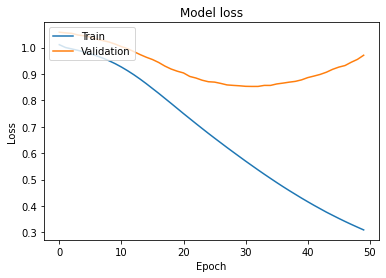

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

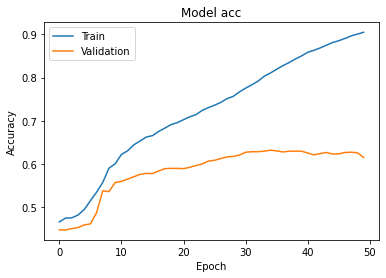

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Avaliação com os Dados de Teste

In [ ]:
y = model.evaluate(X_test,y_test)

111/111 [==============================] - 0s 2ms/step - loss: 0.9611 - accuracy: 0.6403


In [ ]:
import numpy as np
y_prob = model.predict(X_test)
y_prob

array([[0.06023798, 0.1735941 , 0.7661679 ],
       [0.01047055, 0.00477923, 0.9847503 ],
       [0.02346586, 0.95291823, 0.02361584],
       ...,
       [0.17791328, 0.5711793 , 0.25090754],
       [0.08813811, 0.01999052, 0.8918714 ],
       [0.14518419, 0.5271725 , 0.32764325]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob,axis=1)
y_pred

array([2, 2, 1, ..., 1, 2, 1])

In [ ]:
y_test_int

0       2
1       2
2       1
3       0
4       1
       ..
3542    0
3543    1
3544    0
3545    2
3546    1
Length: 3547, dtype: int8

In [ ]:
len(y_pred)

3547

In [ ]:
matriz_confusao = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

# 0 = Positivo
# 1 = Negativo
# 2 - Neutro

for i in range(0, len(y_pred)):
  matriz_confusao[y_test_int[i]][y_pred[i]]+=1

In [ ]:
np.array(matriz_confusao)

array([[ 117,  309,  133],
       [  25, 1182,  306],
       [  34,  469,  972]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_int, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.21      0.32       559
           1       0.60      0.78      0.68      1513
           2       0.69      0.66      0.67      1475

    accuracy                           0.64      3547
   macro avg       0.65      0.55      0.56      3547
weighted avg       0.65      0.64      0.62      3547



In [ ]:
# Função para calcular as métricas

def metricas():
  
  precisao = []
  recall = []
  f1_score = []

  for i in range(len(matriz_confusao)):
    soma_precisao = 0
    soma_recall = 0
    for j in range(len(matriz_confusao)):
      soma_precisao+= matriz_confusao[j][i]
      soma_recall+= matriz_confusao[i][j]
    precisao.append(round(matriz_confusao[i][i]/soma_precisao, 2))
    recall.append(round(matriz_confusao[i][i]/soma_recall, 2))

    f1 = round(2 * (precisao[i] * recall[i]) / (precisao[i] + recall[i]), 2)
    f1_score.append(f1)


  return precisao, recall, f1_score

In [ ]:
precisao, recall, f1_score = metricas()

df_metricas = pd.DataFrame({'Precisão': precisao, 'Recall': recall, 'F1-Score': f1_score})
df_metricas

,Precisão,Recall,F1-Score
0,0.66,0.21,0.32
1,0.60,0.78,0.68
2,0.69,0.66,0.67
